# Buffer Subtraction Demonstration

This notebook shows how to perform buffer subtraction using the FTIR tool suite developed by KBI Biopharma. 

Buffer subtraction tool kit was built to quickly and repeatably subtract buffer spectra from sample absorbance spectra. Historically, this process has been done manually, using visually assessment to determine the proper scaling factor to apply to the buffer spectra prior to substracting from the sample spectra. Two primary functions were built to automate this excercise and improve the repeatability. 

The first function `find_buffer_subtraction_constant` determines the constant scaling value to use for buffer subtraction. The second function `buffer_subtract` takes the absorbance data, and performs the buffer subtraction. Both functions are fairly simple, and their usage is demonstrated below. 


In [8]:
# Imports and pull in some data
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import os
from scipy.signal import savgol_filter
from ftir.io.utils import create_df_from_multiple_files
from ftir.modeling.buffer_subtraction import find_buffer_subtraction_constant, buffer_subtract

os.getcwd()
buffer1 = "water pH 3P73 spiked_0.txt"
buffer2 = "water pH 3P73_0.txt"
sample1 = "lot 021016 rep 1_0.txt"
sample2 = "lot 021016 rep 2_0.txt"


run1 = [buffer1, sample1, sample2]
run2 = [buffer2, sample1, sample2]
df1, fn1 = create_df_from_multiple_files(run1)
df2, fn2 = create_df_from_multiple_files(run2)



Buffer subtraction is show below using four different settings
1. Base - the default setting minimize the variation in the wavenumbers above the Amide I, and below the water band. 
2. Constant - A constant value can be passed to the buffer subtract function, instead of calculated in this example `1` was passed.
3. Custom window - Parameters can be passed to the `find_buffer_substraction_constant` via `buffer_subtract`. These parameters are passes via `constant_params`. In this example, a large window size was specified, which included the water band. 
4. Offset - In addition to subtracting the buffer spectra, the absorbance values are baseline offset using the mean across a specified range. In this example, the values between `3249` and `3251` wavenumbers were used to determine the baseline value.


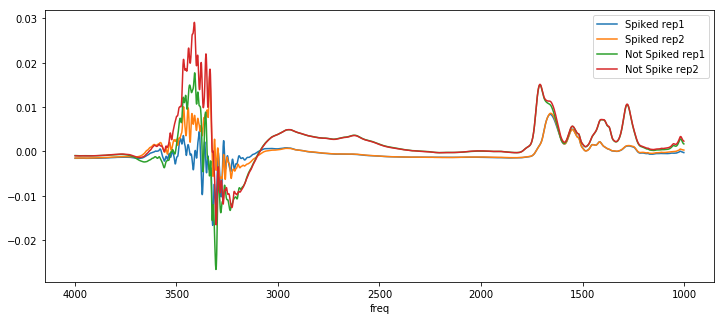

In [2]:
# subtract the data
run1_df = buffer_subtract(df1, constant_params={'window_min': 1750, 'window_max': 2500})
run2_df = buffer_subtract(df2, constant_params={'window_min': 1750, 'window_max': 2300},
                          baseline_min=1750, baseline_max=2300)

ax = run1_df.plot(x='freq', figsize=(12,5))
run2_df.plot(x='freq', ax=ax)
#big_window_df.plot(x='freq', ax=ax)
#offset_df.plot(x='freq', ax=ax)
ax.legend(['Spiked rep1', 'Spiked rep2', 'Not Spiked rep1', 'Not Spike rep2'])
ax.invert_xaxis()

In [3]:
run1_df.to_csv('spiked_aquaspec.csv')
run2_df.to_csv('not_spike_aquaspec.csv')

In [7]:
window_length = 7
polyorder = 2
deriv = 2

sr1_sd = savgol_filter(run1_df['lot 021016 rep 1_0'], window_length, polyorder, deriv=deriv)
sr2_sd = savgol_filter(run1_df['lot 021016 rep 2_0'], window_length, polyorder, deriv=deriv)
r1_sd = savgol_filter(run2_df['lot 021016 rep 1_0'], window_length, polyorder, deriv=deriv)
r2_sd = savgol_filter(run2_df['lot 021016 rep 2_0'], window_length, polyorder, deriv=deriv)

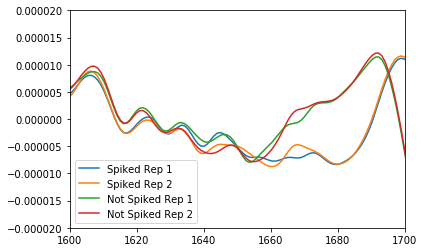

In [26]:
plt.plot(run1_df['freq'], sr1_sd, label='Spiked Rep 1')
plt.plot(run1_df['freq'], sr2_sd, label='Spiked Rep 2')

plt.plot(run2_df['freq'], r1_sd, label='Not Spiked Rep 1')
plt.plot(run2_df['freq'], r2_sd, label='Not Spiked Rep 2')
plt.legend()

plt.xlim([1600, 1700])
plt.ylim([-0.00002, 0.00002])
plt.show()